In [1]:
import os
import numpy as np
import subprocess
import pandas as pd
import random
import matplotlib.pyplot as plt
import time

'''AICI SETAM LOCATIA KERNELULUI DE PYTHON'''
%cd /home_DT4/Work/Petru/Model_DSSAT/DSSAT/Scripts_Petru

/home_DT4/Work/Petru/Model_DSSAT/DSSAT/Scripts_Petru


In [2]:
def change_params_in_MZCER(param_dict):
    input_file_name = 'MZCER048.CUL'
    directory = './'
    with open(os.path.join(directory, input_file_name)) as f:
        lines = f.readlines()
        lines2 = lines.copy()
    params = lines[93].split(' ')
    params[16]  = param_dict['p1']
    params[17]  = param_dict['p2']
    params[18]  = param_dict['p3']
    params[19]  = param_dict['p4']
    params[21]  = param_dict['p5']
    params[22] = param_dict['p6'] + '\n'
    
    
    
    str1 = ' '
    lines[93] = str1.join(params)
    lines[93] = lines[93]+'\n'
    
    with open(os.path.join(directory, input_file_name), 'w') as file:
        file.writelines( lines )
        file.close()
    return lines, lines2

In [76]:



gene_limits = {1:[500,4980], 
               2:[5,285], 
               3:[500,1700], 
               4:[7980,7980], 
               5:[70,151],
               6:[3500,7500]} # CONFIG 555133




Model = ['CNRM-CERFACS-CNRM-CM5-SMHI-RCA4', 'MPI-M-MPI-ESM-LR-SMHI-RCA4', 'ICHEC-EC-EARTH-SMHI-RCA4']
m = Model[0]

param_dict = {
    'p1':1000,      # 4-5 chars
    'p2':100,      # 3-5 chars
    'p3':500,        # 3 chars
    'p4':7980,      # 4-8 chars
    'p5':70,  # 4-8 chars
    'p6':3800         # unlimmited chars
}


def run_simulation_and_get_score(params, year = 2003):

    '''AICI TREBUIE MODIFICATA REFERINTA CATRE MZCER:
    fisierul cu '_base' = fisierul din pe care il folosesc ca baza pentru fiecare experiment '''
    %cp /home_DT4/Work/Petru/Model_DSSAT/DSSAT/RUN_Petru/RUN_rcp85/dssat-csm-os-4.8.0.15/Data/MZCER048.CUL_base /home_DT4/Work/Petru/Model_DSSAT/DSSAT/RUN_Petru/RUN_rcp85/dssat-csm-os-4.8.0.15/Data/MZCER048.CUL

    !./hh2_NEW_SETUP_P+dates {params['p1']} {params['p2']} {params['p3']} {params['p6']} {params['p5']} 1 {m} {year} {year} 1>pp1 2>pp2    
    
    with open('pp1') as f:                                                                                                                                                                                        
        lines = f.readlines()                                                                                                                                                                                            
        lines = [string for string in lines if '  Crop mature on' not in string and
                 'due to slowed grain filling\n' not in string]       
        # FOR MC3 ALGORITHM VERSION
#     folder = lines[88].split(' ')[2][:-1] # scen = rcp45
#     folder = lines[58].split(' ')[2][:-1] # scen = historical

        # FOR MC4 ALGORITHM VERSION
#     folder = lines[95].split(' ')[2][:-1] # scen = historical
    folder = lines[-3].split(' ')[2][:-1] # scen = rcp45 new model
    
    
    with open(os.path.join(folder, 'Info_all_IDEOTYPE')) as f:
        lines = f.readlines()
        display (lines)
                                                                                                                                                
    
#         for i, j in enumerate(lines): # check which line has the output folder                                                                                                                                                         
#             print (i, j)
        score = float(" ".join(lines[4].split()).split(' ')[6]) # ORIGINAL MODEL
#         score = float(" ".join(lines[12].split()).split(' ')[6]) # NEW MODEL & FERT II
        print (score)
        
        
        
#     %cd /home_DT4/Work/Petru/Model_DSSAT/DSSAT/RUN_Petru/RUN_rcp85/dssat-csm-os-4.8.0.15/Data
#     %cp MZCER048.CUL_base MZCER048.CUL
    return score, lines

def run_simulation_for_n_years(params, max_year = 2005, start_year = 1976):
#     start_year = 1976
    harw_per_year = []
    for year in range (start_year, max_year+1):
        score, _ = run_simulation_and_get_score(params, year = year)
        harw_per_year.append(score)
    
    return np.mean(harw_per_year), np.std(harw_per_year, ddof = 1), harw_per_year




# change_params_in_MZCER(param_dict)
score, lines = run_simulation_and_get_score(params = param_dict)
print (score)

["'  '\n",
 'year; 2003 scen: rcp45 model: CNRM-CERFACS-CNRM-CM5-SMHI-RCA4 iter: 1000 100 500 7975 860 3800\n']

IndexError: list index out of range

/home_DT4/Work/Petru/Model_DSSAT/DSSAT/RUN_Petru/RUN_rcp85/dssat-csm-os-4.8.0.15/Data/LOOP_RES_TT/rcp85/CNRM-CERFACS-CNRM-CM5-SMHI-RCA4/YY_2033/I0031_PIOs_3475/Merged_ch_TT_rcp85_CNRM-CERFACS-CNRM-CM5-SMHI-RCA4

In [6]:
%pwd

'/home_DT4/Work/Petru/Model_DSSAT/DSSAT/Scripts_Petru'

In [91]:

hist_start_year = 1976
hist_end_year = 2005

rcp45_start_year = 2021
rcp45_end_year = 2050

current_start_year = rcp45_start_year
current_end_year = rcp45_end_year

m = Model[2]
params_to_test = {'p1':500 ,'p2':5,'p3':1700 ,'p4':7980,
                  'p5':121 ,'p6':7446 }
res = run_simulation_for_n_years(params = params_to_test, max_year = current_end_year, start_year = current_start_year)
l = res[2]
df = pd.DataFrame(l)
df['t1'] = params_to_test['p1']
df['t2'] = params_to_test['p2']
df['t3'] = params_to_test['p3']
df['t4'] = params_to_test['p4']
df['t5'] = params_to_test['p5']
df['t6'] = params_to_test['p6']
df['year'] = np.arange(current_start_year,current_end_year+1)
df['model'] = m
df.rename(columns = {0:'har1'})[['t1','t2','t3','t4','t5','t6','year','model','har1']]
# run_simulation_for_n_years(params = param_dict, max_year = 2005, start_year = 1977)

["'  '\n",
 'year; 2021 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  57  99   941   458   169     0   201   143    12    86  24013  241\n',
 '  2 MZ   2  76  92   473     0   155     0   167   163    10    65  24036  241\n',
 '  3 MZ   3  57 100   969   486   169     0   201   143    12    86  24013  241\n',
 '  4 MZ   4  51  85   910   404   169     0   201   143    13    86  24013  241\n',
 '  5 MZ   5  57  99   942   455   169     0   201   143    22   111  24013  241\n',
 '  6 MZ   6  76 119  1082   562   169     0   201   143    24   110  24013  241\n',
 '  7 MZ   7  57 100   988   496   169     0   201   143    22   111  24013  241\n',
 '  8 MZ   8  51  85   973   459   169     0   201   143    19   112  24013  241\n',
 '  9 MZ   9  57  99   939   451   169     0   

458.0


["'  '\n",
 'year; 2022 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  61 197  5422  3586   474     0   475   149    82    68  23970  241\n',
 '  2 MZ   2  70 202  6060  3933   457     0   463   146    76    62  23982  241\n',
 '  3 MZ   3  61 198  5477  3624   474     0   475   149    82    68  23971  241\n',
 '  4 MZ   4  53 183  5675  4028   474     0   476   148    90    68  23958  240\n',
 '  5 MZ   5  61 197  4920  3325   474     0   467   157    84   103  23966  240\n',
 '  6 MZ   6  70 202  5211  3384   457     0   445   164    83    98  23973  241\n',
 '  7 MZ   7  61 198  4866  3213   474     0   466   159    81   106  23966  240\n',
 '  8 MZ   8  53 183  5039  3499   474     0   465   159    80   113  23955  240\n',
 '  9 MZ   9  61 197  4838  3268   474     0   

3586.0


["'  '\n",
 'year; 2023 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  69 202  7214  5079   656     0   600   152   106    42  23971  241\n',
 '  2 MZ   2  82 222  7431  5410   656     0   604   149   104    42  23974  241\n',
 '  3 MZ   3  70 203  7214  5079   656     0   600   152   106    42  23971  241\n',
 '  4 MZ   4  61 188  5821  3856   656     0   592   161    91    60  23967  240\n',
 '  5 MZ   5  69 202  6047  3911   656     0   582   170    92    94  23965  240\n',
 '  6 MZ   6  82 222  6521  4499   656     0   582   170   102    85  23966  240\n',
 '  7 MZ   7  70 203  6047  3911   656     0   582   170    92    95  23965  240\n',
 '  8 MZ   8  61 188  5391  3425   656     0   585   168    83    93  23965  240\n',
 '  9 MZ   9  69 202  5999  3863   656     0   

5079.0


["'  '\n",
 'year; 2024 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  67 185  9311  6777   508     0   612    54   112    29  23980  241\n',
 '  2 MZ   2  83 205  9170  6949   508     0   610    55   113    28  23979  241\n',
 '  3 MZ   3  68 186  9334  6807   508     0   612    54   112    29  23980  241\n',
 '  4 MZ   4  61 171  9136  6409   508     0   614    51   108    30  23983  241\n',
 '  5 MZ   5  67 185 10718  8180   508     0   613    52   150    26  23979  241\n',
 '  6 MZ   6  83 205 10819  8588   508     0   618    48   153    21  23980  241\n',
 '  7 MZ   7  68 186 10757  8225   508     0   613    52   150    26  23979  241\n',
 '  8 MZ   8  61 171  9580  6845   508     0   610    55   132    33  23982  241\n',
 '  9 MZ   9  67 185 10294  7755   508     0   

6777.0


["'  '\n",
 'year; 2025 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1 -99  21     0     0   143     0   160   157     0    42  24069  241\n',
 '  2 MZ   2  70 179  5541  4050   435     0   487   104    60    87  23969  240\n',
 '  3 MZ   3 -99  21     0     0   143     0   160   157     0    41  24070  241\n',
 '  4 MZ   4  60 198  6091  4093   458     0   536    76    85    69  23963  240\n',
 '  5 MZ   5 -99  21     0     0   143     0   160   157     0    78  24069  241\n',
 '  6 MZ   6  70 179  5895  4423   435     0   496    96    91    85  23974  241\n',
 '  7 MZ   7 -99  21     0     0   143     0   160   157     0    78  24070  241\n',
 '  8 MZ   8  60 196  6101  4115   457     0   531    81    91    98  23959  240\n',
 '  9 MZ   9 -99  21     0     0   143     0   

0.0


["'  '\n",
 'year; 2026 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  64 219  9196  7442   604     0   637   105   133    33  23953  240\n',
 '  2 MZ   2  75 213  8642  6639   547     0   601    89   112    41  23968  241\n',
 '  3 MZ   3  64 220  9384  7579   604     0   634   108   135    33  23952  240\n',
 '  4 MZ   4  56 205  9427  7711   604     0   638   103   137    33  23950  240\n',
 '  5 MZ   5  64 219  9881  8127   604     0   639   102   149    49  23954  240\n',
 '  6 MZ   6  75 213 10682  8679   547     0   619    70   153    35  23968  241\n',
 '  7 MZ   7  64 220 10037  8231   604     0   636   106   151    49  23952  240\n',
 '  8 MZ   8  56 205  9935  8220   604     0   639   103   149    48  23950  240\n',
 '  9 MZ   9  64 219 10084  8330   604     0   

7442.0


["'  '\n",
 'year; 2027 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  69 187  7873  5834   673     0   669   111   100    43  23975  241\n',
 '  2 MZ   2  81 207  7899  5690   673     0   663   116    92    48  23979  241\n',
 '  3 MZ   3  70 188  7961  5846   673     0   667   112    98    44  23976  241\n',
 '  4 MZ   4  64 173  8048  5850   673     0   668   111   101    45  23971  241\n',
 '  5 MZ   5  69 187  6920  4879   673     0   634   145   106    71  23968  241\n',
 '  6 MZ   6  81 207  9034  6823   673     0   664   115   119    54  23979  241\n',
 '  7 MZ   7  70 188  6702  4585   673     0   630   149   103    74  23968  241\n',
 '  8 MZ   8  64 173  6339  4167   673     0   627   152    97    82  23961  240\n',
 '  9 MZ   9  69 187  6671  4630   673     0   

5834.0


["'  '\n",
 'year; 2028 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  65 170  5559  4028   420     0   523    55    89    49  23980  241\n',
 '  2 MZ   2  82 185  5891  4207   420     0   519    58    89    43  23985  241\n',
 '  3 MZ   3  65 171  5702  4257   420     0   525    53    92    47  23978  241\n',
 '  4 MZ   4  58 178  5433  3580   443     0   538    62    84    60  23973  241\n',
 '  5 MZ   5  65 170  5290  3760   420     0   516    61    86    84  23978  241\n',
 '  6 MZ   6  82 185  5559  3875   420     0   510    67    90    79  23983  241\n',
 '  7 MZ   7  65 171  5297  3852   420     0   516    62    87    85  23976  241\n',
 '  8 MZ   8  58 178  5394  3541   443     0   533    67    83    98  23971  241\n',
 '  9 MZ   9  65 170  5270  3739   420     0   

4028.0


["'  '\n",
 'year; 2029 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  63 201  8899  7049   570     0   636    93   128    25  23967  240\n',
 '  2 MZ   2  78 221  8964  7041   570     0   632    96   122    27  23969  241\n',
 '  3 MZ   3  65 202  8980  7024   570     0   636    92   127    25  23967  241\n',
 '  4 MZ   4  58 187  8872  6677   570     0   635    93   128    27  23965  240\n',
 '  5 MZ   5  63 201  8500  6650   570     0   622   106   138    50  23964  240\n',
 '  6 MZ   6  78 221  9280  7357   570     0   627   102   147    39  23967  240\n',
 '  7 MZ   7  65 202  8504  6548   570     0   622   107   137    51  23964  240\n',
 '  8 MZ   8  58 187  8261  6065   570     0   621   107   130    54  23961  240\n',
 '  9 MZ   9  63 201  8329  6478   570     0   

7049.0


["'  '\n",
 'year; 2030 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  61 163  7217  5068   328     0   444    40   100    33  23986  241\n',
 '  2 MZ   2  80 180  6239  4127   328     0   427    57    88    44  23988  241\n',
 '  3 MZ   3  62 163  6824  4731   328     0   437    47    96    37  23987  241\n',
 '  4 MZ   4  55 168  6603  4630   328     0   442    42   100    47  23971  241\n',
 '  5 MZ   5  61 163  6086  3965   328     0   409    75    95    77  23977  241\n',
 '  6 MZ   6  80 180  5672  3561   328     0   404    80    89    84  23980  241\n',
 '  7 MZ   7  62 163  5825  3732   328     0   407    77    92    79  23978  241\n',
 '  8 MZ   8  55 168  6454  4480   328     0   431    53   102    83  23967  241\n',
 '  9 MZ   9  61 163  5758  3652   328     0   

5068.0


["'  '\n",
 'year; 2031 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  68 179  8842  6896   414     0   512    53   118    29  23975  241\n',
 '  2 MZ   2  77 183  9012  6979   397     0   504    45   114    27  23976  241\n',
 '  3 MZ   3  67 173  8923  7025   400     0   507    44   117    28  23974  241\n',
 '  4 MZ   4  59 165  8734  6814   414     0   515    50   121    28  23972  241\n',
 '  5 MZ   5  68 179  9045  7093   414     0   508    58   139    40  23976  241\n',
 '  6 MZ   6  77 183  8775  6738   397     0   494    54   136    39  23977  241\n',
 '  7 MZ   7  67 173  9168  7263   400     0   503    48   138    37  23975  241\n',
 '  8 MZ   8  59 165  8606  6682   414     0   509    56   130    50  23973  241\n',
 '  9 MZ   9  68 179  8461  6507   414     0   

6896.0


["'  '\n",
 'year; 2032 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  64 197  6734  5285   389     0   512    40    98    33  23995  241\n',
 '  2 MZ   2  66 185  3473  1646   383     0   439   108    54    95  23968  241\n',
 '  3 MZ   3  65 198  6734  5285   389     0   512    40    98    33  23995  241\n',
 '  4 MZ   4  63 183  8334  6031   389     0   500    50   105    38  23977  241\n',
 '  5 MZ   5  64 197  7060  5804   389     0   506    46   118    43  23999  241\n',
 '  6 MZ   6  66 155  6347  3900   376     0   420   120    72    92  23988  241\n',
 '  7 MZ   7  65 198  6943  5700   389     0   507    46   120    43  23999  241\n',
 '  8 MZ   8  63 184  7993  5690   389     0   488    63   126    54  23972  241\n',
 '  9 MZ   9  64 198  7276  6071   389     0   

5285.0


["'  '\n",
 'year; 2033 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  55  83   884   346   191     0   238   127    17    68  24027  241\n',
 '  2 MZ   2  70 103   683   274   191     0   238   127    15    69  24028  241\n',
 '  3 MZ   3  55  84   860   372   191     0   238   127    17    68  24027  241\n',
 '  4 MZ   4  53  69   701     0   191     0   239   127    19    68  24025  241\n',
 '  5 MZ   5  55  83   881   346   191     0   238   127    19    90  24027  241\n',
 '  6 MZ   6  70 103   742   332   191     0   238   128    23    97  24028  241\n',
 '  7 MZ   7  55  84   886   395   191     0   238   127    20    90  24027  241\n',
 '  8 MZ   8  53  69   705     0   191     0   239   127    23    87  24025  241\n',
 '  9 MZ   9  55  83   889   347   191     0   

346.0


["'  '\n",
 'year; 2034 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  62 202  8520  6678   666     0   651   133   113    43  23964  240\n',
 '  2 MZ   2  75 184  8172  6334   571     0   600    95   106    32  23980  241\n',
 '  3 MZ   3  63 209  8393  6350   673     0   649   141   109    49  23961  240\n',
 '  4 MZ   4  54 210  8663  6684   689     0   666   139   118    51  23948  240\n',
 '  5 MZ   5  62 202  6825  4984   666     0   602   182   108    90  23951  240\n',
 '  6 MZ   6  75 184  9130  7291   571     0   603    92   130    43  23978  241\n',
 '  7 MZ   7  63 209  6208  4165   673     0   599   191    94   110  23946  240\n',
 '  8 MZ   8  54 210  6558  4579   689     0   622   183    99   103  23938  240\n',
 '  9 MZ   9  62 202  6097  4255   666     0   

6678.0


["'  '\n",
 'year; 2035 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  67 200  7369  5564   524     0   614    53    96    46  23978  241\n',
 '  2 MZ   2  79 195  7584  5599   504     0   592    56    91    43  23986  241\n',
 '  3 MZ   3  67 201  7570  5705   524     0   613    54    97    46  23976  241\n',
 '  4 MZ   4  61 198  7697  5725   524     0   620    48    99    51  23968  241\n',
 '  5 MZ   5  67 200  8437  6632   524     0   623    45   117    55  23976  241\n',
 '  6 MZ   6  79 195  6374  4400   504     0   551    97    95    82  23975  241\n',
 '  7 MZ   7  67 201  8630  6765   524     0   622    45   118    55  23975  241\n',
 '  8 MZ   8  61 198  8321  6385   524     0   618    49   118    67  23966  241\n',
 '  9 MZ   9  67 200  8648  6846   524     0   

5564.0


["'  '\n",
 'year; 2036 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  52 148  5673  4391   329     0   428    67    82    46  23991  241\n',
 '  2 MZ   2  57 148  6567  4962   320     0   413    73    85    35  23995  241\n',
 '  3 MZ   3  53 150  5668  4376   329     0   429    66    82    46  23990  241\n',
 '  4 MZ   4  59 182  4718  3020   474     0   481   144    72    89  23953  240\n',
 '  5 MZ   5  52 148  4876  3839   329     0   416    80    92    77  23983  241\n',
 '  6 MZ   6  57 148  5446  3970   320     0   384   103    85    79  23986  241\n',
 '  7 MZ   7  53 150  4841  3801   329     0   415    80    92    78  23982  241\n',
 '  8 MZ   8  59 182  4598  2999   474     0   478   147    72   125  23951  240\n',
 '  9 MZ   9  52 148  4783  3767   329     0   

4391.0


["'  '\n",
 'year; 2037 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  63 204 10126  7969   703     0   710   107   135    29  23955  240\n',
 '  2 MZ   2  74 224  9995  8080   703     0   703   111   140    26  23953  240\n',
 '  3 MZ   3  63 205 10072  7988   703     0   705   108   137    27  23954  240\n',
 '  4 MZ   4  61 190  9079  6920   703     0   720    99   118    42  23960  241\n',
 '  5 MZ   5  63 204 11141  8982   703     0   717   101   160    32  23956  240\n',
 '  6 MZ   6  74 224 11057  9130   703     0   710   104   167    30  23957  240\n',
 '  7 MZ   7  63 205 10945  8856   703     0   715   102   158    31  23955  240\n',
 '  8 MZ   8  61 190 10358  8228   703     0   709   111   150    46  23955  240\n',
 '  9 MZ   9  63 204 11802  9643   703     0   

7969.0


["'  '\n",
 'year; 2038 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  58  75   677     0   247     0   305   114    27    62  24023  241\n',
 '  2 MZ   2  64  86  1634   180   247     0   293   127    23    57  24032  241\n',
 '  3 MZ   3  60  77   660     0   252     0   305   119    27    63  24023  241\n',
 '  4 MZ   4  54  74   575   112   276     0   320   127    24    78  24010  241\n',
 '  5 MZ   5  58  75   678     0   247     0   305   114    32    88  24023  241\n',
 '  6 MZ   6  64  88  1778   551   247     0   293   127    37    80  24031  241\n',
 '  7 MZ   7  60  77   661     0   252     0   305   119    32    90  24022  241\n',
 '  8 MZ   8  54  74   555    96   276     0   320   127    24   105  24010  241\n',
 '  9 MZ   9  58  75   678     0   247     0   

0.0


["'  '\n",
 'year; 2039 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  60  76   241     0   152     0   177   150     8    87  24016  241\n',
 '  2 MZ   2  65  91   432   118   147     0   174   148     7    82  24022  241\n',
 '  3 MZ   3  61  77   241     0   152     0   177   150     8    87  24016  241\n',
 '  4 MZ   4  47  64   226     0   152     0   179   149     8    89  24014  241\n',
 '  5 MZ   5  60  76   239     0   152     0   177   150     8   122  24016  241\n',
 '  6 MZ   6  65  91   430   114   147     0   174   148     7   118  24022  241\n',
 '  7 MZ   7  61  77   239     0   152     0   177   150     8   121  24016  241\n',
 '  8 MZ   8  47  64   218     0   152     0   179   149     8   122  24014  241\n',
 '  9 MZ   9  60  76   238     0   152     0   

0.0


["'  '\n",
 'year; 2040 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  62 162  6507  4627   350     0   435    77    94    50  23974  241\n',
 '  2 MZ   2  68 153  6176  4356   299     0   409    53    83    41  23993  241\n',
 '  3 MZ   3  63 163  6507  4627   350     0   435    77    94    50  23974  241\n',
 '  4 MZ   4  48 148  6507  4627   350     0   435    77    94    50  23974  241\n',
 '  5 MZ   5  62 162  5389  3684   350     0   406   106    87   101  23963  240\n',
 '  6 MZ   6  68 153  6498  4781   299     0   403    59   106    58  23989  241\n',
 '  7 MZ   7  63 163  5389  3685   350     0   406   106    87   101  23963  240\n',
 '  8 MZ   8  48 148  5801  4013   350     0   415    97    94    88  23966  240\n',
 '  9 MZ   9  62 162  5270  3605   350     0   

4627.0


["'  '\n",
 'year; 2041 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  65 180  7581  5432   477     0   578    60   100    32  23986  241\n',
 '  2 MZ   2  80 200  7541  5938   477     0   583    54   106    26  23987  241\n',
 '  3 MZ   3  67 181  7425  5265   477     0   578    59    98    33  23988  241\n',
 '  4 MZ   4  56 166  7235  5153   477     0   576    61   102    33  23983  241\n',
 '  5 MZ   5  65 180  7018  4868   477     0   561    77   106    66  23980  241\n',
 '  6 MZ   6  80 200  6799  5196   477     0   564    74   112    58  23982  241\n',
 '  7 MZ   7  67 181  6931  4770   477     0   562    76   106    64  23982  241\n',
 '  8 MZ   8  56 166  6691  4609   477     0   561    76   103    71  23977  241\n',
 '  9 MZ   9  65 180  6928  4778   477     0   

5432.0


["'  '\n",
 'year; 2042 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  60 166  6258  4219   324     0   433    58    83    46  23988  241\n',
 '  2 MZ   2  60 132  2039  1088   302     0   358   111    35    82  23998  241\n',
 '  3 MZ   3  61 167  6258  4219   324     0   433    58    83    46  23988  241\n',
 '  4 MZ   4  49 158  6185  4265   327     0   438    56    85    47  23986  241\n',
 '  5 MZ   5  60 166  5319  3363   324     0   409    82    78    94  23979  241\n',
 '  6 MZ   6  60 124  3542  2800   301     0   355   113    66    77  24006  241\n',
 '  7 MZ   7  61 167  5320  3364   324     0   409    82    78    94  23979  241\n',
 '  8 MZ   8  49 158  5562  3677   327     0   420    74    86    72  23979  241\n',
 '  9 MZ   9  60 166  5245  3295   324     0   

4219.0


["'  '\n",
 'year; 2043 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  53 174  8573  6273   444     0   500    98   100    47  23972  241\n',
 '  2 MZ   2  66 177  8280  6187   414     0   476    93    96    40  23980  241\n',
 '  3 MZ   3  52 170  8819  6546   437     0   500    92   105    41  23972  241\n',
 '  4 MZ   4  49 186  9052  6589   519     0   543   126   114    46  23960  240\n',
 '  5 MZ   5  53 174  9615  7379   444     0   509    90   136    46  23972  241\n',
 '  6 MZ   6  66 177  9933  7977   414     0   489    81   139    33  23979  241\n',
 '  7 MZ   7  52 170  9941  7695   437     0   514    78   142    37  23974  241\n',
 '  8 MZ   8  49 186  9480  7103   519     0   542   127   143    52  23960  240\n',
 '  9 MZ   9  53 174  8687  6492   444     0   

6273.0


["'  '\n",
 'year; 2044 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  64 188  9548  7351   616     0   673    70   125    33  23963  241\n',
 '  2 MZ   2  80 204  9248  7221   614     0   661    81   121    37  23961  241\n',
 '  3 MZ   3  64 185  9501  7401   614     0   669    72   126    32  23963  241\n',
 '  4 MZ   4  57 205  9208  6913   698     0   701   118   117    47  23956  240\n',
 '  5 MZ   5  64 188 10844  8647   616     0   690    53   149    33  23965  241\n',
 '  6 MZ   6  80 204 10969  8942   614     0   683    59   155    35  23965  241\n',
 '  7 MZ   7  64 185 10895  8794   614     0   685    56   152    34  23966  241\n',
 '  8 MZ   8  57 205 10295  8008   698     0   699   120   140    47  23952  240\n',
 '  9 MZ   9  64 188 11302  9104   616     0   

7351.0


["'  '\n",
 'year; 2045 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  71 193  6623  4772   439     0   550    56    97    37  23986  241\n',
 '  2 MZ   2  83 190  7185  5157   428     0   518    78    86    38  23996  241\n',
 '  3 MZ   3  72 194  6623  4772   439     0   550    56    97    37  23986  241\n',
 '  4 MZ   4  58 179  6461  4658   439     0   549    57    98    37  23984  241\n',
 '  5 MZ   5  71 193  5497  3646   439     0   529    77    84    88  23978  241\n',
 '  6 MZ   6  83 190  6780  4751   428     0   506    90   107    56  23991  241\n',
 '  7 MZ   7  72 194  5497  3645   439     0   529    77    84    89  23978  241\n',
 '  8 MZ   8  58 179  5534  3730   439     0   531    76    86    77  23978  241\n',
 '  9 MZ   9  71 193  5391  3539   439     0   

4772.0


["'  '\n",
 'year; 2046 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  57 150  4259  2369   276     0   363    71    62    74  23980  241\n',
 '  2 MZ   2  73 165  4266  2435   276     0   366    68    64    65  23987  241\n',
 '  3 MZ   3  57 150  4171  2326   276     0   363    72    60    76  23980  241\n',
 '  4 MZ   4  52 160  3473  2013   306     0   383    81    57    91  23966  240\n',
 '  5 MZ   5  57 150  4111  2367   276     0   355    79    61   114  23976  241\n',
 '  6 MZ   6  73 165  4252  2454   276     0   358    76    64   104  23983  241\n',
 '  7 MZ   7  57 150  4092  2354   276     0   357    77    60   114  23977  241\n',
 '  8 MZ   8  52 160  3480  2060   306     0   382    82    57   118  23965  240\n',
 '  9 MZ   9  57 150  3987  2268   276     0   

2369.0


["'  '\n",
 'year; 2047 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  62  79   182     0   206     0   250   131     9    61  24041  241\n',
 '  2 MZ   2  79  97   213     0   198     0   244   129    10    59  24042  241\n',
 '  3 MZ   3  63  80   182     0   206     0   250   131     9    61  24041  241\n',
 '  4 MZ   4  55  94   464   238   236     0   282   128    11    82  24018  241\n',
 '  5 MZ   5  62  79   182     0   206     0   250   131    10    96  24041  241\n',
 '  6 MZ   6  79  97   211     0   198     0   244   129    12    93  24042  241\n',
 '  7 MZ   7  63  80   182     0   206     0   250   131    10    96  24041  241\n',
 '  8 MZ   8  55  94   460   234   236     0   282   129    11   116  24018  241\n',
 '  9 MZ   9  62  79   181     0   206     0   

0.0


["'  '\n",
 'year; 2048 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  63 172  9563  7357   499     0   592    66   129    25  23965  241\n',
 '  2 MZ   2  74 179  8960  7044   496     0   572    83   121    26  23972  241\n',
 '  3 MZ   3  64 173  9540  7254   499     0   592    65   127    25  23967  241\n',
 '  4 MZ   4  62 183  8817  6606   516     0   606    67   125    35  23961  241\n',
 '  5 MZ   5  63 172 10051  7845   499     0   585    73   155    32  23964  240\n',
 '  6 MZ   6  74 179  9815  7896   496     0   571    84   151    30  23972  241\n',
 '  7 MZ   7  64 173  9984  7699   499     0   584    74   152    34  23965  240\n',
 '  8 MZ   8  62 183  8483  6272   516     0   589    85   140    57  23956  240\n',
 '  9 MZ   9  63 172  9033  6827   499     0   

7357.0


["'  '\n",
 'year; 2049 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  58 201 12173  9951   649     0   692    96   168    33  23920  240\n',
 '  2 MZ   2  68 199 12068  9817   624     0   663    99   163    31  23926  240\n',
 '  3 MZ   3  58 202 12007  9886   649     0   693    95   169    32  23922  240\n',
 '  4 MZ   4  55 187 12823 10295   649     0   695    92   174    32  23914  240\n',
 '  5 MZ   5  58 201 13688 11466   649     0   707    81   204    22  23925  240\n',
 '  6 MZ   6  68 199 13703 11451   624     0   681    83   199    22  23933  240\n',
 '  7 MZ   7  58 202 13451 11329   649     0   709    79   204    21  23927  240\n',
 '  8 MZ   8  55 187 14278 11745   649     0   707    80   211    25  23917  240\n',
 '  9 MZ   9  58 201 14365 12143   649     0   

9951.0


["'  '\n",
 'year; 2050 scen: rcp45 model: ICHEC-EC-EARTH-SMHI-RCA4 iter: 500 5 1700 7975 860 7446\n',
 'RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC\n',
 '           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha\n',
 '  1 MZ   1  69 193  7741  6208   467     0   567    37   113    33  23973  241\n',
 '  2 MZ   2  85 196  7725  5603   454     0   550    41   102    32  23987  241\n',
 '  3 MZ   3  69 183  7868  6223   454     0   555    36   113    32  23974  241\n',
 '  4 MZ   4  63 179  7784  6044   467     0   567    37   107    42  23969  241\n',
 '  5 MZ   5  69 193  8165  6631   467     0   566    38   121    57  23973  241\n',
 '  6 MZ   6  85 196  8683  6559   454     0   551    40   122    49  23986  241\n',
 '  7 MZ   7  69 183  8249  6604   454     0   554    38   121    56  23974  241\n',
 '  8 MZ   8  63 179  8181  6440   467     0   566    38   116    67  23968  241\n',
 '  9 MZ   9  69 193  8216  6682   467     0   

6208.0


,t1,t2,t3,t4,t5,t6,year,model,har1
0,500,5,1700,7980,121,7446,2021,ICHEC-EC-EARTH-SMHI-RCA4,458.0
1,500,5,1700,7980,121,7446,2022,ICHEC-EC-EARTH-SMHI-RCA4,3586.0
2,500,5,1700,7980,121,7446,2023,ICHEC-EC-EARTH-SMHI-RCA4,5079.0
3,500,5,1700,7980,121,7446,2024,ICHEC-EC-EARTH-SMHI-RCA4,6777.0
4,500,5,1700,7980,121,7446,2025,ICHEC-EC-EARTH-SMHI-RCA4,0.0
5,500,5,1700,7980,121,7446,2026,ICHEC-EC-EARTH-SMHI-RCA4,7442.0
6,500,5,1700,7980,121,7446,2027,ICHEC-EC-EARTH-SMHI-RCA4,5834.0
7,500,5,1700,7980,121,7446,2028,ICHEC-EC-EARTH-SMHI-RCA4,4028.0
8,500,5,1700,7980,121,7446,2029,ICHEC-EC-EARTH-SMHI-RCA4,7049.0
9,500,5,1700,7980,121,7446,2030,ICHEC-EC-EARTH-SMHI-RCA4,5068.0


In [92]:
print (f'Calcul fitness a rezultatelor obtinute prin inputarea in algoritmul doamnei Caian: {df[0].mean() - df[0].std()/4}')

Calcul fitness a rezultatelor obtinute prin inputarea in algoritmul doamnei Caian: 4013.0620588795196


## MODEL GENETIC:

In [14]:
def random_genome(lists, weights, num_to_select): # lists = genomes
    # normalize weights so they add up to 1
    total_weight = sum(weights)
    normalized_weights = [w/total_weight for w in weights]
    
    # create a list of indices
    indices = list(range(len(lists)))
    # randomly select indices based on weights
    selected_indices = random.choices(indices, weights=normalized_weights, k=num_to_select)
    
    # create a list of selected lists
    selected_lists = [lists[i] for i in selected_indices]
    
    # remove duplicates if any
    selected_lists = list(set(tuple(l) for l in selected_lists))
    selected_lists = [list(t) for t in selected_lists]  # convert back to list of lists
    
    # randomly select additional lists if necessary
    while len(selected_lists) < num_to_select:
        remaining_indices = list(set(indices) - set(selected_indices))
        additional_index = random.choice(remaining_indices)
        selected_lists.append(lists[additional_index])
    
    return selected_lists

def generate_solutions():
#     return (df.sample()[['t1','t2','t3','t4','t5','t6']] + 0.01).to_numpy().tolist()[0]
    res = []
    for g in range (1,7):
        res.append(round( random.uniform(gene_limits[g][0], gene_limits[g][1]) ))
    return res
    


#     return [random.choice(t1s),random.choice(t2s),random.choice(t3s),random.choice(t4s),random.choice(t5s),random.choice(t6s)]

def generate_population(size):
    return [generate_solutions() for _ in range (size)]

def fitness(genome):
    
    global all_pop_fitness
    global pop_yearly_harw

    if tuple(genome) in all_pop_fitness:
        return all_pop_fitness[tuple(genome)]
    else:
    
    
    #     %cd /home_DT4/Work/Petru/Model_DSSAT/DSSAT/RUN_Petru/RUN_rcp85/dssat-csm-os-4.8.0.15/Data 
        
        param_dict = {
            'p1':round(genome[0]),# 4-5 chars
            'p2':round(genome[1]),# 4-5 chars
            'p3':round(genome[2]),# up to 6 chars
            'p4':round(genome[3]),# 4-8 chars
            'p5':round(genome[4]),# 4-8 chars
            'p6':round(genome[5]) # nelimitat chars
        }
    #     change_params_in_MZCER(param_dict)
        mean, std, harw_per_year = run_simulation_for_n_years(param_dict, end_year, start_year)
        score = mean - (std/4)
        all_pop_fitness[tuple(genome)] = score
        pop_yearly_harw[tuple(genome)] = harw_per_year


        return score

def selection_pair(population, fitnessFunc):
#     print ('--------------- SELECTION -------------')
    def list2string(l):
        return ' '.join(str(x) for x in l)
    
    genome2int_map = [i for i in range(len(population))]
    
    # FOR RANK SELECTION
    fitnesses = {}
    for genome in population:
        fitnesses[list2string(genome)] = fitnessFunc(genome)
#     fitnesses = {genome:fitnessFunc(genome) for genome in population}
#     print ('INITIAL FITNESSES')
#     print (fitnesses)
    fitnesses = {k: v for k, v in sorted(fitnesses.items(), key=lambda item: item[1])}
#     print ('SORTED FITNESSES')
#     print (fitnesses)
    ws = {}
    i = 0.1
    for pop in fitnesses.keys():
        ws[pop] = i
        i+=0.1
#     print (ws)
    ws = [ws[list2string(genome)] for genome in population]
    
    # FOR ABSOLUTE FITNESS SELECTION
#     ws = [(fitnessFunc(genome)) for genome in population]
#     selection = random.choices(population = population,
#                          weights = ws,
#                          k = 2)
    selection = random_genome(lists = population, weights = ws, num_to_select = 2)
    
    return selection

def blend_crossover(genomeA, genomeB, B = 0.75):
    nbr_genes_crossovered = random.randint(1, 3)
    genes_to_cross = random.sample([1,2,3,5,6], nbr_genes_crossovered)
    childA, childB = genomeA.copy(), genomeB.copy()
    for g_nbr in genes_to_cross:
        g = g_nbr - 1
        childA[g] = round( B * childA[g] + (1 - B) * childB[g] )
        childB[g] = round( (1 - B) * childA[g] + B * childB[g] )
    
#     print (genes_to_cross)
#     print (genomeA, genomeB)
#     print (childA, childB)
    return childA, childB



def mutation(genome, num = 1, probability = 0.5):
    if random.uniform(0, 1) > probability:
        genes_to_cross = random.sample([1,2,3,5,6], num)
        for g in genes_to_cross:
            genome[g-1] = round( random.uniform(gene_limits[g][0], gene_limits[g][1]) )  # change round fct if continuous
    return genome


def closest_to_z(X, Y, Z):
    if abs(X - Z) < abs(Y - Z):
        return X
    else:
        return Y

def shift_10percent_towards_limits(X,Y,Z):
    
    if abs(X - Z) < abs(Y - Z):
        return max(X, Z - (Y-X)/10)
    else:
        return min(Y, Z + (Y-X)/10)

def run_evolution(fitness_limit, population_number = 10, generation_limit = 500, key_limit = None):
    population = generate_population(population_number)
    global pop_fitness_history
    
    
    for gen in range (generation_limit):
        len_keys = len(all_pop_fitness.keys())
        
        
        
        if key_limit is not None and len_keys > key_limit:
            break
        
        
        print ('generation:', gen, ', # keys:', len(all_pop_fitness.keys()))
        current_pop_fitness = []
        if (gen+1)%50==0:
            print (gen+1)
        
        
        for pop in population:
            f = fitness(pop)
            current_pop_fitness.append(f)
                
#         population = sorted(population, key = lambda genome: current_pop_fitness, reverse = True)
        population = [pop for _, pop in sorted(zip(current_pop_fitness, population), reverse = True)]
        
        if gen % gen_nbr_to_do_extreme_mutation == 0:
            top_pop = population[0]
            for gene in range(len(top_pop)):
                new_pop = list(top_pop) # copying previous top_pop so we can modify it
#                 new_pop[gene] = closest_to_z(gene_limits[gene+1][0], gene_limits[gene+1][1], new_pop[gene])
                new_pop[gene] = shift_10percent_towards_limits(gene_limits[gene+1][0], gene_limits[gene+1][1], new_pop[gene])
                if fitness(new_pop) > fitness(top_pop):
                    top_pop = new_pop
                pop_fitness_history.append(fitness(new_pop))
            population[0] = top_pop
                

        next_generation = population[0:2]
        for j in range(int((len(population)/2) - 1)):
            parents = selection_pair(population, fitness)
#             print (parents)
            offspringA, offspringB = blend_crossover(parents[0], parents[1])
            offspringA = mutation(offspringA)
            offspringB = mutation(offspringB)

            next_generation += [offspringA, offspringB]
            population = next_generation
        
        
        pop_fitness_history.extend(current_pop_fitness)

#         population = sorted(population, key = lambda genome: fitness(genome), reverse = True)
#         best_pop_history.append(population[0])
    return population


In [ ]:

%cd /home_DT4/Work/Petru/Model_DSSAT/DSSAT/Scripts_Petru
target_var = 'har1'
fitness_limit = 100000
# mean_harvests = df.groupby(['t1','t2','t3','t4','t5','t6']).mean()['har1'].sort_values(ascending = False).reset_index() - uncomment if comparison with Mihaela Method
population_number = 10
generation_limit = 60
start_year = 1976
end_year = 2005
repeat_alg = 3
gen_nbr_to_do_extreme_mutation = 20

all_pop_fitness = {}   # keeping memory of previous simluations to know what we need to compute
pop_yearly_harw = {}   # recording results
pop_fitness_history = [] # recording results generation by generation to check evolution of fitness
start_time = time.time()

def run_alg(repeat = repeat_alg, 
        population_number = population_number,
        generation_limit = generation_limit):

    
    global pop_fitness_history
    bestvals = []
    
    for r in range(repeat):
        print()
        print()
        print()
        print()
        print()
        pops = run_evolution(fitness_limit, population_number = population_number, generation_limit = generation_limit)
    

        
        
bestvals = run_alg(repeat = repeat_alg, 
        population_number = population_number,
        generation_limit = generation_limit)

stop_time = time.time()
print ('duration', start_time - stop_time)

/home_DT4/Work/Petru/Model_DSSAT/DSSAT/Scripts_Petru





generation: 0 , # keys: 0


In [ ]:
len(pop_fitness_history)

# Analysis

In [ ]:

# stop_time = time.time()
print ('duration', (start_time - stop_time)/3600)

In [ ]:
len(list(all_pop_fitness.keys()))

In [ ]:
(stop_time - start_time)/len(list(all_pop_fitness.keys()))

In [ ]:
plt.plot(pop_fitness_history, linewidth = 0.5)

In [ ]:
pops_per_repeat = generation_limit*population_number
for x in range (repeat_alg):
    plt.scatter(np.arange(pops_per_repeat), pop_fitness_history[x*pops_per_repeat:(x+1)*pops_per_repeat], s = 0.45)
    plt.title(x)
    plt.show()

In [ ]:
fh_df = pd.DataFrame.from_dict(all_pop_fitness,orient='index')
pyh_df = pd.DataFrame.from_dict(pop_yearly_harw,orient='index')
pyh_df.index = pd.MultiIndex.from_tuples(pyh_df.index)

In [ ]:
fh_df.to_pickle(f'all_pop_fitness_RankSelection_555133_WITHPLANTDATE_extremeMutation_v2_gen{generation_limit}_Model{m[:5]}_repeat{repeat_alg}.pkl')
pyh_df.to_pickle(f'pop_yearly_harvest_RankSelection_555133_WITHPLANTDATE_extremeMutation_v2_gen{generation_limit}_Model{m[:5]}_repeat{repeat_alg}.pkl')


In [13]:
%pwd

'/home_DT4/Work/Petru/Model_DSSAT/DSSAT/Scripts_Petru'

In [14]:
%ls

31_dec_probSelSq_FitnessLazar_70gen_20repeat/
all_pop_fitness_gen25_repeat10.pkl
all_pop_fitness_gen50_repeat5.pkl
all_pop_fitness.pkl
all_pop_fitness_RankSelection_555133_extremeMutation_gen50_repeat5.pkl
all_pop_fitness_RankSelection_555133_extremeMutation_v2_gen50_ModelICHEC_repeat4.pkl
all_pop_fitness_RankSelection_555133_extremeMutation_v2_gen50_ModelMPI_repeat4.pkl
all_pop_fitness_RankSelection_555133_extremeMutation_v2_gen50_repeat4.pkl
all_pop_fitness_RankSelection_555133_gen50_repeat5.pkl
all_pop_fitness_RankSelection_555133_WITHPLANTDATE_extremeMutation_v2_gen60_ModelICHEC_repeat3.pkl
all_pop_fitness_RankSelection_gen50_repeat5.pkl
cmd_Line
hh*
hh2*
hh2_NEW_SETUP_old*
hh2_NEW_SETUP_P+dates*
hh2_NEW_SETUP_P+dates_mc*
hh2_NEW_SETUP_P+dates_test_OK*
MZCER048.CUL_base
o1
o2
oo1
oo2
p1
p2
pop_yearly_harvest_gen25_repeat10.pkl
pop_yearly_harvest_gen50_repeat5.pkl
pop_yearly_harvest.pkl
pop_yearly_harvest_RankSelection_555133_extremeMutation_gen50_repeat5.pkl
pop_yearly_harvest_Rank

In [26]:
f'pop_yearly_harvest_RankSelection_555133_WITHPLANTDATE_extremeMutation_v2_gen{generation_limit}_ModelICHEC_repeat{repeat_alg}.pkl'

'pop_yearly_harvest_RankSelection_555133_WITHPLANTDATE_extremeMutation_v2_gen60_ModelICHEC_repeat3.pkl'

# ANALIZA REZULTATE

In [43]:
fh_df.sort_values(ascending = False)

index
(50.0, 22.0, 1700.0, 798.0, 92.0, 75.0)        5376.090266
(50.0, 24.0, 1700.0, 798.0, 92.0, 75.0)        5376.090266
(50.0, 5.0, 1700.0, 798.0, 92.0, 75.0)         5376.090266
(50.0, 22.0, 1700.0, 798.0, 94.0, 75.0)        5359.552093
(50.0, 22.0, 1700.0, 798.0, 93.0, 75.0)        5356.886715
                                                  ...     
(490.8, 25.0, 1388.0, 798.0, 127.0, 74.49)      982.464304
(488.5, 48.0, 1092.0, 798.0, 150.0, 43.36)      830.658321
(312.4, 93.0, 561.0, 798.0, 83.0, 45.06)        806.604513
(478.4, 227.0, 543.0, 798.0, 85.0, 73.53)       780.039631
(444.5, 261.0, 1432.0, 798.0, 140.0, 53.86)     386.852794
Name: 0, Length: 1172, dtype: float64

In [25]:
%pwd

'/home_DT4/Work/Petru/Model_DSSAT/DSSAT/Scripts_Petru'

all_pop_fitness_RankSelection_555133_WITHPLANTDATE_extremeMutation_v2_gen60_ModelCNRM_repeat3.pkl


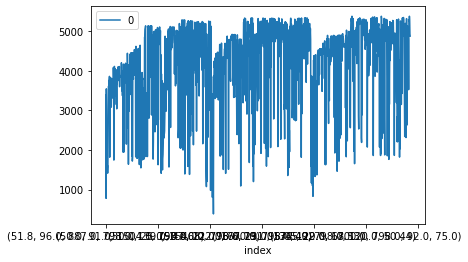

,index,0
0,"(50.0, 22.0, 1700.0, 798.0, 92.0, 75.0)",5376.090266
1,"(50.0, 24.0, 1700.0, 798.0, 92.0, 75.0)",5376.090266
2,"(50.0, 5.0, 1700.0, 798.0, 92.0, 75.0)",5376.090266
3,"(50.0, 22.0, 1700.0, 798.0, 94.0, 75.0)",5359.552093
4,"(50.0, 22.0, 1700.0, 798.0, 93.0, 75.0)",5356.886715
...,...,...
1167,"(490.8, 25.0, 1388.0, 798.0, 127.0, 74.49)",982.464304
1168,"(488.5, 48.0, 1092.0, 798.0, 150.0, 43.36)",830.658321
1169,"(312.4, 93.0, 561.0, 798.0, 83.0, 45.06)",806.604513
1170,"(478.4, 227.0, 543.0, 798.0, 85.0, 73.53)",780.039631


all_pop_fitness_RankSelection_555133_WITHPLANTDATE_extremeMutation_v2_gen60_ModelCNRM_repeat3.pkl


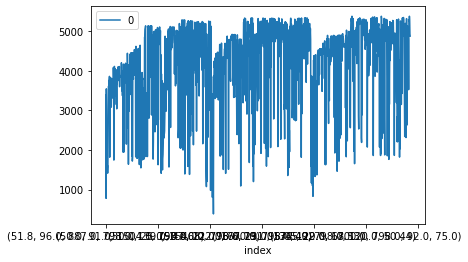

,index,0
0,"(50.0, 22.0, 1700.0, 798.0, 92.0, 75.0)",5376.090266
1,"(50.0, 24.0, 1700.0, 798.0, 92.0, 75.0)",5376.090266
2,"(50.0, 5.0, 1700.0, 798.0, 92.0, 75.0)",5376.090266
3,"(50.0, 22.0, 1700.0, 798.0, 94.0, 75.0)",5359.552093
4,"(50.0, 22.0, 1700.0, 798.0, 93.0, 75.0)",5356.886715
...,...,...
1167,"(490.8, 25.0, 1388.0, 798.0, 127.0, 74.49)",982.464304
1168,"(488.5, 48.0, 1092.0, 798.0, 150.0, 43.36)",830.658321
1169,"(312.4, 93.0, 561.0, 798.0, 83.0, 45.06)",806.604513
1170,"(478.4, 227.0, 543.0, 798.0, 85.0, 73.53)",780.039631


all_pop_fitness_RankSelection_555133_WITHPLANTDATE_extremeMutation_v2_gen60_ModelCNRM_repeat3.pkl


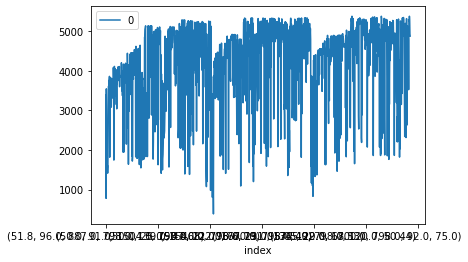

,index,0
0,"(50.0, 22.0, 1700.0, 798.0, 92.0, 75.0)",5376.090266
1,"(50.0, 24.0, 1700.0, 798.0, 92.0, 75.0)",5376.090266
2,"(50.0, 5.0, 1700.0, 798.0, 92.0, 75.0)",5376.090266
3,"(50.0, 22.0, 1700.0, 798.0, 94.0, 75.0)",5359.552093
4,"(50.0, 22.0, 1700.0, 798.0, 93.0, 75.0)",5356.886715
...,...,...
1167,"(490.8, 25.0, 1388.0, 798.0, 127.0, 74.49)",982.464304
1168,"(488.5, 48.0, 1092.0, 798.0, 150.0, 43.36)",830.658321
1169,"(312.4, 93.0, 561.0, 798.0, 83.0, 45.06)",806.604513
1170,"(478.4, 227.0, 543.0, 798.0, 85.0, 73.53)",780.039631


In [34]:
result_files = ['all_pop_fitness_RankSelection_555133_WITHPLANTDATE_extremeMutation_v2_gen60_ModelCNRM_repeat3.pkl',
                'all_pop_fitness_RankSelection_555133_WITHPLANTDATE_extremeMutation_v2_gen60_ModelCNRM_repeat3.pkl',
                'all_pop_fitness_RankSelection_555133_WITHPLANTDATE_extremeMutation_v2_gen60_ModelCNRM_repeat3.pkl']

for file in range(len(result_files)):
    print (result_files[file])
    res_file = result_files[file]
    fh_df = pd.read_pickle(res_file)
    pyh_df = pd.read_pickle(res_file)

    fh_df = fh_df.reset_index()
    divisors = (10, 1, 1, 10, 1, 100)
    fh_df['index'] = fh_df['index'].apply(lambda x: tuple(i/j for i, j in zip(x, divisors)))
    fh_df = fh_df.set_index('index')
    fh_df.plot()
    plt.show()

    display(fh_df[0].sort_values(ascending = False).reset_index())

Reminder: Valoarea maxima obtinuta prin metoda determinista are ca parametrii: 

(500,5,1700,798,1100,7500) si fitness = 5473.436227


In [16]:
gene_limits = {1:[50,498], 
               2:[5,285], 
               3:[500,1700], 
               4:[798,798], 
               5:[7,11],
               6:[35,75]} # CONFIG 555133

In [44]:
print (f'Fitness daca schimb p1 de la 532 la 500: {fitness((500, 16, 1668, 7980, 1039, 7475))  }')
print (f'Apoi, fitness daca schimb p2 de la 16 la 5: {fitness((500, 5, 1668, 7980, 1039, 7475))  }')
print (f'Apoi, fitness daca schimb p3 de la 1668 la 1700: {fitness((500, 5, 1700, 7980, 1039, 7475))  }')
print (f'Apoi, fitness daca schimb p5 de la 1039 la 1100: {fitness((500, 5, 1700, 7980, 1100, 7475))  }')
print (f'Apoi, fitness daca schimb p6 de la 7475 la 7500: {fitness((500, 5, 1700, 7980, 1100, 7500))  }')

Fitness daca schimb p1 de la 532 la 500: 5462.803376375961
Apoi, fitness daca schimb p2 de la 16 la 5: 5462.803376375961
Apoi, fitness daca schimb p3 de la 1668 la 1700: 5493.762048176117
Apoi, fitness daca schimb p5 de la 1039 la 1100: 5510.637826946624
Apoi, fitness daca schimb p6 de la 7475 la 7500: 5473.436226691774


In [20]:
!pwd

/home_DT4/Work/Petru/Model_DSSAT/DSSAT/Scripts_Petru


In [33]:
pyh_df.sort_values(0, ascending = False)

,0
"(500, 5, 1700, 7980, 92, 7500)",5376.090266
"(500, 24, 1700, 7980, 92, 7500)",5376.090266
"(500, 22, 1700, 7980, 92, 7500)",5376.090266
"(500, 22, 1700, 7980, 94, 7500)",5359.552093
"(500, 22, 1700, 7980, 93, 7500)",5356.886715
...,...
"(4908, 25, 1388, 7980, 127, 7449)",982.464304
"(4885, 48, 1092, 7980, 150, 4336)",830.658321
"(3124, 93, 561, 7980, 83, 4506)",806.604513
"(4784, 227, 543, 7980, 85, 7353)",780.039631


In [28]:
df_temp = pd.DataFrame(columns = ['mean', 'std'])
df_temp['mean'] = pyh_df.mean(axis = 1)
df_temp['std'] = pyh_df.std(axis = 1)
df_temp['fitness (mean-0.25*std)'] = df_temp['mean'] - (df_temp['std']/4)
df_temp = df_temp.reset_index()
df_temp = df_temp.rename(columns = {'level_0':'p_1',
                         'level_1':'p_2',
                         'level_2':'p_3',
                         'level_3':'p_4',
                         'level_4':'p_5',
                         'level_5':'p_6'})

In [29]:
df_temp

,index,mean,std,fitness (mean-0.25*std)
0,"(518, 96, 887, 7980, 139, 4708)",3388.253345,NaN,NaN
1,"(4784, 227, 543, 7980, 85, 7353)",780.039631,NaN,NaN
2,"(1639, 51, 1297, 7980, 74, 6486)",3543.622764,NaN,NaN
3,"(2369, 33, 1466, 7980, 100, 4233)",2771.410818,NaN,NaN
4,"(3043, 47, 1426, 7980, 74, 3691)",2393.248454,NaN,NaN
...,...,...,...,...
1167,"(500, 32, 1700, 7980, 100, 7500)",5259.237538,NaN,NaN
1168,"(500, 24, 1700, 7980, 92, 7500)",5376.090266,NaN,NaN
1169,"(500, 30, 1700, 7980, 100, 7500)",5297.238240,NaN,NaN
1170,"(500, 22, 1700, 7980, 92, 5137)",4923.965355,NaN,NaN


In [19]:
df_temp = df_temp.set_index(['p_1','p_2','p_3','p_4','p_5','p_6'])

KeyError: "None of ['p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6'] are in the columns"

In [20]:
df_temp.sort_values('fitness (mean-0.25*std)', ascending = False).iloc[:30]


,index,mean,std,fitness (mean-0.25*std)
0,"(590, 159, 799, 7980, 791, 5537)",1472.742706,NaN,NaN
1,"(1758, 142, 894, 7980, 736, 5341)",1088.357012,NaN,NaN
2,"(2971, 245, 820, 7980, 808, 5274)",704.529725,NaN,NaN
3,"(2976, 232, 642, 7980, 1017, 5004)",636.549331,NaN,NaN
4,"(1277, 203, 1275, 7980, 779, 7121)",1894.330517,NaN,NaN
5,"(580, 222, 883, 7980, 873, 5654)",1694.270533,NaN,NaN
6,"(3979, 190, 1031, 7980, 1083, 7126)",848.078978,NaN,NaN
7,"(3610, 66, 1378, 7980, 795, 3527)",1086.226883,NaN,NaN
8,"(1842, 102, 1069, 7980, 1099, 6933)",1657.268139,NaN,NaN
9,"(2246, 22, 1454, 7980, 882, 4395)",1539.547504,NaN,NaN


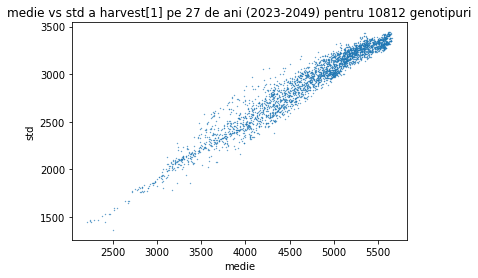

In [27]:
plt.scatter(df_temp['mean'], df_temp['std'], s = 0.1)
plt.title('medie vs std a harvest[1] pe 27 de ani (2023-2049) pentru 10812 genotipuri')
plt.xlabel('medie')
plt.ylabel('std')
plt.show()

Corelatia intre medie si std e practic liniara si nu are outliers, deci in principiu tot ce are medie mai mare are fitness mai mare (STD nu e foarte relevant in calculul de fitness)

In [28]:
df_temp.reset_index(inplace = True)

In [29]:
df_temp

,p_1,p_2,p_3,p_4,p_5,p_6,mean,std,fitness (mean-0.25*std)
0,5422,35,1455,7975,1548,2018,4982.214286,3202.109656,4181.686872
1,3184,207,614,7975,1913,4841,3266.678571,2105.934068,2740.195054
2,2385,120,1295,7975,1586,806,4948.821429,2993.123948,4200.540442
3,1192,148,1256,7975,1429,1321,4627.321429,2765.316941,3935.992193
4,4974,99,946,7975,1892,4967,3362.535714,2178.137456,2818.001350
...,...,...,...,...,...,...,...,...,...
3168,2430,271,890,7975,821,1207,5085.500000,3157.309198,4296.172701
3169,2430,271,1049,7975,821,4623,3781.714286,2365.308168,3190.387244
3170,2430,284,1406,7975,821,1207,5494.357143,3364.787542,4653.160257
3171,2430,150,1525,7975,821,8359,3601.071429,2419.046291,2996.309856


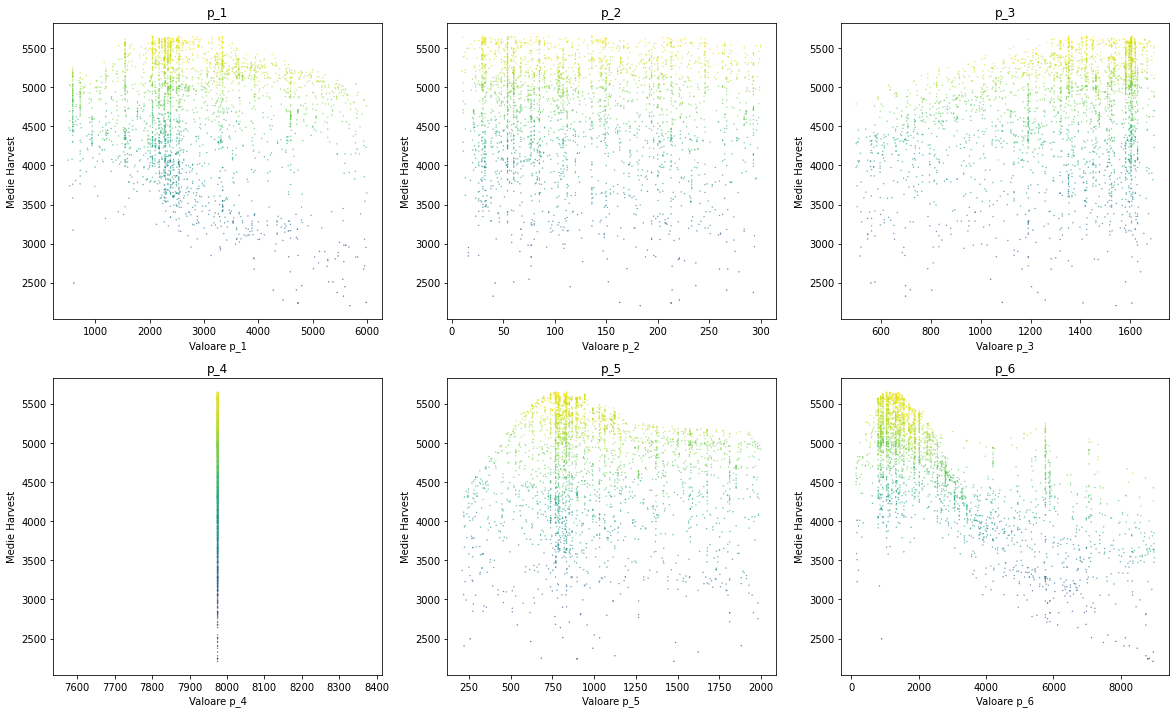

In [30]:
figure, axis = plt.subplots(2, 3, figsize=(20,12))
def plot_6(posx,posy, i, df_temp = df_temp, title_add = ''):
    axis[posx,posy].scatter(df_temp['p_' + str(i)], df_temp['mean'], c = df_temp['std'], s = 0.1)
    axis[posx,posy].set_title('p_' + str(i) + title_add)
    axis[posx,posy].set_xlabel(f'Valoare p_{i}')
    axis[posx,posy].set_ylabel(f'Medie Harvest')
    
plot_6(0,0,1)
plot_6(0,1,2)
plot_6(0,2,3)
plot_6(1,0,4)
plot_6(1,1,5)
plot_6(1,2,6)


In [31]:
repeat_alg,population_number,generation_limit,

(15, 10, 27)

In [32]:
pops_per_repeat = population_number*generation_limit
for i in range (repeat_alg):
    print ('cel mai bun rezultat HARWT din run-ul ' + str(i+1))
    print (np.sum(max(pop_fitness_history[i*pops_per_repeat:(i+1) * pops_per_repeat])))

cel mai bun rezultat HARWT din run-ul 1
4785.401619914529
cel mai bun rezultat HARWT din run-ul 2
4753.999815451528
cel mai bun rezultat HARWT din run-ul 3
4791.673170033947
cel mai bun rezultat HARWT din run-ul 4
4742.056021210294
cel mai bun rezultat HARWT din run-ul 5
4808.624886247346
cel mai bun rezultat HARWT din run-ul 6
4773.439354121518
cel mai bun rezultat HARWT din run-ul 7
4760.529572983519
cel mai bun rezultat HARWT din run-ul 8
4803.369412574058
cel mai bun rezultat HARWT din run-ul 9
4767.092597915286
cel mai bun rezultat HARWT din run-ul 10
4450.440703643922
cel mai bun rezultat HARWT din run-ul 11
4807.607945175572
cel mai bun rezultat HARWT din run-ul 12
4741.559832906471
cel mai bun rezultat HARWT din run-ul 13
4794.13808448763
cel mai bun rezultat HARWT din run-ul 14
4666.609285430799
cel mai bun rezultat HARWT din run-ul 15
4770.842249490851


### Verificare rapiditate de atins x% din valoarea maxima obtinuta prin metoda determinista

In [55]:
def first_value_higher_than_x(df, x):
    # Create a boolean mask by applying a comparison operation element-wise
    mask = df.applymap(lambda value: value > x)
    
    # Get the indices (row, column) of True values in the mask
    indices = np.argwhere(mask.to_numpy())

    # If there are any True values in the mask, return the corresponding value in the DataFrame
    if len(indices) > 0:
        row, col = indices[0]
        return (row, col, df.iat[row, col])

    return None
x = 99
result = first_value_higher_than_x(fh_df, 5473.436227 * (x/100))
print (result)

(965, 0, 5419.300987323164)


# Simulations randomized - Implementation without genetic algorithm, just random trials

In [ ]:

all_pop_fitness_rdn = {}   # folosit ca sa stim ce trebuie sa simulam, si ce am simulat deja (ca sa nu computam degeaba)
pop_yearly_harw_rdn = {}   # folosit doar pentru inspectii
for i in range(df_temp.shape[0]):
    solution = []
    for g in range (1,7):
        solution.append(round( random.uniform(gene_limits[g][0], gene_limits[g][1]) ))
    
    param_dict = {
            'p1':round(solution[0]),# 4-5 chars
            'p2':round(solution[1]),# 4-5 chars
            'p3':round(solution[2]),# up to 6 chars
            'p4':round(solution[3]),# 4-8 chars
            'p5':round(solution[4]),# 4-8 chars
            'p6':round(solution[5]) # nelimitat chars
        }
#     change_params_in_MZCER(param_dict)
    mean, std, harw_per_year = run_simulation_for_n_years(param_dict, end_year)
    score = mean - (std/4)
    all_pop_fitness_rdn[tuple(solution)] = score
    pop_yearly_harw_rdn[tuple(solution)] = harw_per_year

In [556]:
pyh_df_rdn = pd.DataFrame.from_dict(pop_yearly_harw_rdn,orient='index')
pyh_df_rdn.index = pd.MultiIndex.from_tuples(pyh_df_rdn.index)

In [568]:
df_temp_rdn = pd.DataFrame(columns = ['mean', 'std'])
df_temp_rdn['mean'] = pyh_df_rdn.mean(axis = 1)
df_temp_rdn['std'] = pyh_df_rdn.std(axis = 1)
df_temp_rdn['fitness (mean-0.25*std)'] = df_temp_rdn['mean'] - 0.25*df_temp_rdn['std']
df_temp_rdn = df_temp_rdn.reset_index()
df_temp_rdn['level_0'] = df_temp_rdn['level_0'] / 10.
df_temp_rdn['level_1'] = df_temp_rdn['level_1'] / 100.
df_temp_rdn['level_2'] = df_temp_rdn['level_2'] / 1.
df_temp_rdn['level_3'] = df_temp_rdn['level_3'] / 10.
df_temp_rdn['level_4'] = df_temp_rdn['level_4'] / 100.
df_temp_rdn['level_5'] = df_temp_rdn['level_5'] / 100.
df_temp_rdn = df_temp_rdn.rename(columns = {'level_0':'p_1',
                         'level_1':'p_2',
                         'level_2':'p_3',
                         'level_3':'p_4',
                         'level_4':'p_5',
                         'level_5':'p_6'})

In [569]:
df_temp_rdn = df_temp_rdn.set_index(['p_1','p_2','p_3','p_4','p_5','p_6'])

In [570]:
df_temp_rdn.sort_values('fitness (mean-0.25*std)', ascending = False).iloc[:30]


,,,,,,mean,std,fitness (mean-0.25*std)
p_1,p_2,p_3,p_4,p_5,p_6,,,
251.5,0.84,1691.0,797.5,7.98,10.98,7255.629630,2970.114672,6513.100962
275.9,1.36,1595.0,797.5,7.80,10.19,7239.148148,2958.551435,6499.510289
245.4,1.42,1562.0,797.5,8.35,10.98,7205.814815,2962.930761,6465.082125
352.6,1.20,1581.0,797.5,6.87,10.00,7140.000000,2739.761065,6455.059734
261.4,0.19,1678.0,797.5,6.80,10.62,7172.481481,2913.827992,6444.024483
342.0,1.67,1509.0,797.5,6.84,9.89,7124.925926,2749.340186,6437.590880
229.4,1.59,1562.0,797.5,7.64,14.02,7161.074074,2958.068990,6421.556827
241.0,1.93,1669.0,797.5,8.97,11.67,7151.851852,2932.663474,6418.685983
257.8,2.11,1587.0,797.5,6.27,8.54,7116.888889,2797.481317,6417.518560


In [560]:
df_temp_rdn.reset_index(inplace = True)

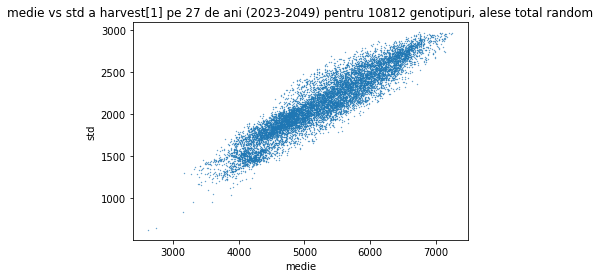

In [561]:
plt.scatter(df_temp_rdn['mean'], df_temp_rdn['std'], s = 0.1)
plt.title('medie vs std a harvest[1] pe 27 de ani (2023-2049) pentru 10812 genotipuri, alese total random')
plt.xlabel('medie')
plt.ylabel('std')
plt.show()

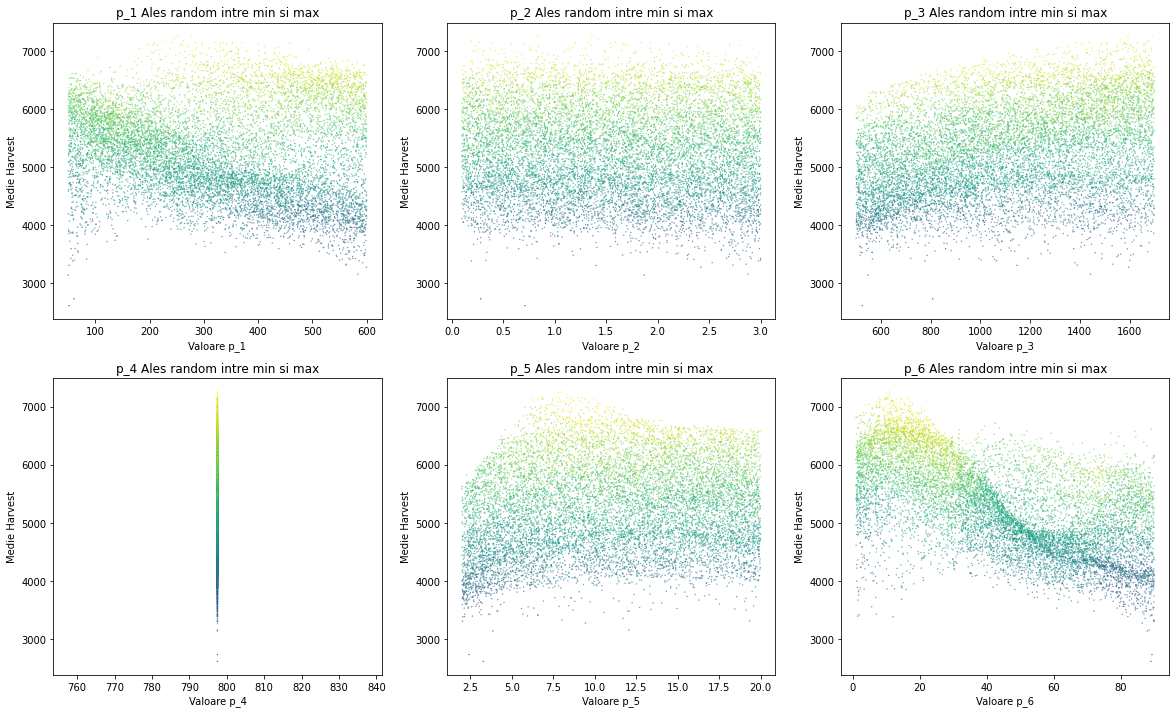

In [562]:
figure, axis = plt.subplots(2, 3, figsize=(20,12))

plot_6(0,0,1, df_temp = df_temp_rdn, title_add = ' Ales random intre min si max')
plot_6(0,1,2, df_temp_rdn, title_add = ' Ales random intre min si max')
plot_6(0,2,3, df_temp_rdn, title_add = ' Ales random intre min si max')
plot_6(1,0,4, df_temp_rdn, title_add = ' Ales random intre min si max')
plot_6(1,1,5, df_temp_rdn, title_add = ' Ales random intre min si max')
plot_6(1,2,6, df_temp_rdn, title_add = ' Ales random intre min si max')
plt.show()

In [563]:
df_temp.columns

Index(['mean', 'std', 'fitness (mean-0.25*std)'], dtype='object')

In [564]:
df_temp['mean'].mean(), df_temp['std'].mean(), df_temp['fitness (mean-0.25*std)'].mean()

(6350.93852229638, 2572.4164991984258, 5707.834397496774)

In [565]:
df_temp_rdn['mean'].mean(), df_temp_rdn['std'].mean(), df_temp_rdn['fitness (mean-0.25*std)'].mean()

(5267.063369233088, 2126.5735118510224, 4735.419991270332)

In [854]:
df_temp_rdn = df_temp_rdn.sort_values('fitness (mean-0.25*std)', ascending = False)
df_temp = df_temp.sort_values('fitness (mean-0.25*std)', ascending = False)

In [855]:
def calc_diff(df_temp, df_temp_rdn):
    for topk in [2,5,10,50,100,500,1000]:
        print ('top', topk,' random result:',round(df_temp_rdn.\
                   iloc[:topk].mean()), '+-', round(df_temp_rdn.\
                   iloc[:topk].std()))
        print ('top', topk,'genetic result:',round(df_temp.iloc[:topk].mean()),'+-', 
               round(df_temp.iloc[:topk].std()))

        print ('difference in means:', (df_temp_rdn.\
                   iloc[:topk].mean() - df_temp.\
                   iloc[:topk].mean())/df_temp.\
                   iloc[:topk].mean())

        print ('')
calc_diff(df_temp['fitness (mean-0.25*std)'], df_temp_rdn['fitness (mean-0.25*std)'])

top 2  random result: 6506 +- 10
top 2 genetic result: 6586 +- 3
difference in means: -0.012172428094297307

top 5  random result: 6475 +- 30
top 5 genetic result: 6585 +- 2
difference in means: -0.01664895190878205

top 10  random result: 6449 +- 35
top 10 genetic result: 6584 +- 2
difference in means: -0.020490546654501132

top 50  random result: 6363 +- 59
top 50 genetic result: 6571 +- 9
difference in means: -0.03157375366434777

top 100  random result: 6289 +- 88
top 100 genetic result: 6561 +- 11
difference in means: -0.041533757648552855

top 500  random result: 6042 +- 146
top 500 genetic result: 6529 +- 20
difference in means: -0.0745796581455713

top 1000  random result: 5917 +- 166
top 1000 genetic result: 6505 +- 29
difference in means: -0.0903479278295624



In [263]:
display(df_temp.iloc[:10])
display(df_temp_rdn.iloc[:10])

,index,p_1,p_2,p_3,p_4,p_5,p_6,mean,std,fitness (mean-0.25*std)
2316,2316,321.6,0.27,1687.0,797.5,7.40,12.48,7267.666667,2936.903537,6533.440782
2408,2408,283.8,0.27,1687.0,797.5,8.14,15.98,7202.777778,2970.215757,6460.223839
2543,2543,283.0,0.34,1687.0,797.5,7.29,15.98,7184.370370,2926.816453,6452.666257
8145,8145,240.0,1.95,1631.0,797.5,6.80,4.67,7152.851852,2815.385172,6449.005559
2349,2349,396.2,0.27,1641.0,797.5,8.04,14.57,7149.592593,2848.479274,6437.472774
781,781,284.8,1.97,1582.0,797.5,8.33,14.23,7165.555556,2922.258009,6434.991053
2361,2361,321.6,0.27,1672.0,797.5,8.00,15.98,7159.296296,2916.697076,6430.122027
8198,8198,277.5,1.64,1595.0,797.5,6.81,4.67,7113.740741,2763.684478,6422.819621
8931,8931,354.9,0.43,1541.0,797.5,7.65,6.11,7133.925926,2847.993017,6421.927672
8916,8916,214.9,2.43,1541.0,797.5,7.94,6.11,7140.592593,2896.369548,6416.500206


,p_1,p_2,p_3,p_4,p_5,p_6,mean,std,fitness (mean-0.25*std)
5586,251.5,0.84,1691.0,797.5,7.98,10.98,7255.629630,2970.114672,6513.100962
8075,275.9,1.36,1595.0,797.5,7.80,10.19,7239.148148,2958.551435,6499.510289
9868,245.4,1.42,1562.0,797.5,8.35,10.98,7205.814815,2962.930761,6465.082125
1171,352.6,1.20,1581.0,797.5,6.87,10.00,7140.000000,2739.761065,6455.059734
126,261.4,0.19,1678.0,797.5,6.80,10.62,7172.481481,2913.827992,6444.024483
669,342.0,1.67,1509.0,797.5,6.84,9.89,7124.925926,2749.340186,6437.590880
4482,229.4,1.59,1562.0,797.5,7.64,14.02,7161.074074,2958.068990,6421.556827
49,241.0,1.93,1669.0,797.5,8.97,11.67,7151.851852,2932.663474,6418.685983
671,257.8,2.11,1587.0,797.5,6.27,8.54,7116.888889,2797.481317,6417.518560
8791,336.1,0.26,1386.0,797.5,7.87,7.84,7143.481481,2906.925158,6416.750192


Text(0, 0.5, 'Fitness')

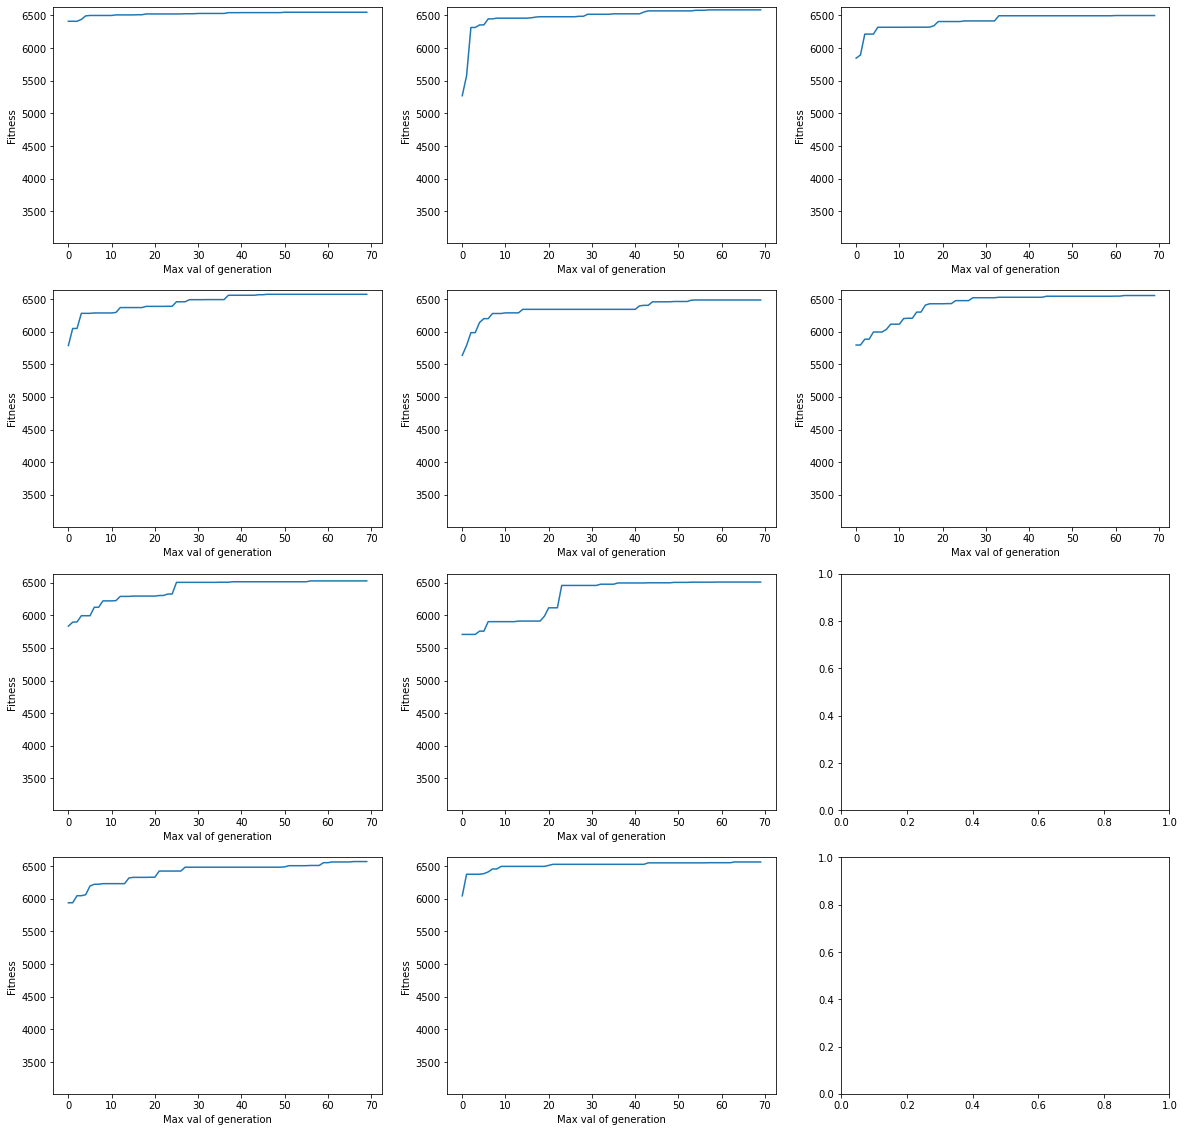

In [850]:
figure, axis = plt.subplots(4, 3, figsize = (20,20))
topval = lambda x: list(max(x[i*10:(i+1)*10]) for i in range(int(len(x)/10.)))
i = 10
axis[0, 0].plot(topval(pop_fitness_history[i*pops_per_repeat:(i+1) * pops_per_repeat]))
axis[0, 0].set_ylim(min(pop_fitness_history), max(pop_fitness_history)+50)
axis[0, 0].set_xlabel('Max val of generation')
axis[0, 0].set_ylabel('Fitness')

i+=1
axis[1, 0].plot(topval(pop_fitness_history[i*pops_per_repeat:(i+1) * pops_per_repeat]))
axis[1, 0].set_ylim(min(pop_fitness_history), max(pop_fitness_history)+50)
axis[1, 0].set_xlabel('Max val of generation')
axis[1, 0].set_ylabel('Fitness')

i+=1
axis[2, 0].plot(topval(pop_fitness_history[i*pops_per_repeat:(i+1) * pops_per_repeat]))
axis[2, 0].set_ylim(min(pop_fitness_history), max(pop_fitness_history)+50)
axis[2, 0].set_xlabel('Max val of generation')
axis[2, 0].set_ylabel('Fitness')

i+=1
axis[3, 0].plot(topval(pop_fitness_history[i*pops_per_repeat:(i+1) * pops_per_repeat]))
axis[3, 0].set_ylim(min(pop_fitness_history), max(pop_fitness_history)+50)
axis[3, 0].set_xlabel('Max val of generation')
axis[3, 0].set_ylabel('Fitness')

i+=1
axis[0, 1].plot(topval(pop_fitness_history[i*pops_per_repeat:(i+1) * pops_per_repeat]))
axis[0, 1].set_ylim(min(pop_fitness_history), max(pop_fitness_history)+50)
axis[0, 1].set_xlabel('Max val of generation')
axis[0, 1].set_ylabel('Fitness')

i+=1
axis[1, 1].plot(topval(pop_fitness_history[i*pops_per_repeat:(i+1) * pops_per_repeat]))
axis[1, 1].set_ylim(min(pop_fitness_history), max(pop_fitness_history)+50)
axis[1, 1].set_xlabel('Max val of generation')
axis[1, 1].set_ylabel('Fitness')

i+=1
axis[2, 1].plot(topval(pop_fitness_history[i*pops_per_repeat:(i+1) * pops_per_repeat]))
axis[2, 1].set_ylim(min(pop_fitness_history), max(pop_fitness_history)+50)
axis[2, 1].set_xlabel('Max val of generation')
axis[2, 1].set_ylabel('Fitness')

i+=1
axis[3, 1].plot(topval(pop_fitness_history[i*pops_per_repeat:(i+1) * pops_per_repeat]))
axis[3, 1].set_ylim(min(pop_fitness_history), max(pop_fitness_history)+50)
axis[3, 1].set_xlabel('Max val of generation')
axis[3, 1].set_ylabel('Fitness')

i+=1
axis[0, 2].plot(topval(pop_fitness_history[i*pops_per_repeat:(i+1) * pops_per_repeat]))
axis[0, 2].set_ylim(min(pop_fitness_history), max(pop_fitness_history)+50)
axis[0, 2].set_xlabel('Max val of generation')
axis[0, 2].set_ylabel('Fitness')

i+=1
axis[1, 2].plot(topval(pop_fitness_history[i*pops_per_repeat:(i+1) * pops_per_repeat]))
axis[1, 2].set_ylim(min(pop_fitness_history), max(pop_fitness_history)+50)
axis[1, 2].set_xlabel('Max val of generation')
axis[1, 2].set_ylabel('Fitness')


In [878]:
def cut_df_gens(df, n_gen):

    res = []
    get_first_n_gens = lambda x, n_gen, rep: x[rep*pops_per_repeat:(rep * pops_per_repeat) + n_gen*10]
    for rep in range(repeat_alg):
        res.append(get_first_n_gens(df, n_gen, rep))
    return res
        


first_n_gens = 25
take_first_rdn_genotypes = ((10812/repeat_alg)/generation_limit)*first_n_gens*repeat_alg
df_temp_cut_to_25_gens = pd.Series(cut_df_gens(pop_fitness_history, first_n_gens)).explode().sort_values(ascending = False)
df_temp_rdn_cut_to_25_gens = pd.Series(list(all_pop_fitness_rdn.values())[:int(np.ceil(take_first_rdn_genotypes))]).sort_values(ascending = False)
print (take_first_rdn_genotypes)

3861.4285714285716


In [879]:

calc_diff(df_temp_cut_to_25_gens, df_temp_rdn_cut_to_25_gens)

top 2  random result: 6463 +- 7
top 2 genetic result: 6582 +- 0
difference in means: -0.018057773310703358

top 5  random result: 6448 +- 16
top 5 genetic result: 6565 +- 15
difference in means: -0.017906984987577118

top 10  random result: 6419 +- 38
top 10 genetic result: 6558 +- 13
difference in means: -0.021154696708024938

top 50  random result: 6271 +- 96
top 50 genetic result: 6540 +- 13
difference in means: -0.04109985687468153

top 100  random result: 6166 +- 128
top 100 genetic result: 6533 +- 12
difference in means: -0.05623418621471893

top 500  random result: 5867 +- 185
top 500 genetic result: 6494 +- 30
difference in means: -0.09655058359508167

top 1000  random result: 5650 +- 264
top 1000 genetic result: 6446 +- 57
difference in means: -0.12342488102380515



## Dimensionality Reduction

In [49]:
x_pca

,0,1,2,3,4,5,target
0,-0.593554,0.401735,-1.111118,0.299621,-0.658601,1.350428e-16,6724.0
1,0.426380,1.015598,-1.415164,0.539798,-0.518412,1.047745e-16,6195.0
2,1.753787,-0.266995,0.332995,0.079885,-0.167223,1.416344e-16,5670.0
3,-1.126441,-1.699341,1.498580,0.465298,0.283175,3.923379e-15,7346.0
4,0.650540,0.888984,0.925649,-0.754430,1.950265,9.340059e-19,6221.0
...,...,...,...,...,...,...,...
1562,-1.164094,0.844937,-1.009817,0.160223,1.469660,3.213127e-18,6141.0
1563,0.757754,1.368665,-0.686533,-0.451187,-0.593546,1.055534e-17,6496.0
1564,-0.382237,1.438963,0.132636,-1.490018,0.446521,6.400142e-18,5520.0
1565,0.434131,1.145514,-1.437573,-0.851619,-0.151809,1.192710e-17,5759.0


explained variance:  [2.82538592e-01 2.10094745e-01 2.03747831e-01 1.64293295e-01
 1.39325536e-01 1.97831521e-33]


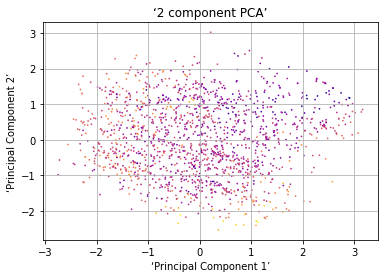

In [48]:
import matplotlib.pyplot as plt



from sklearn.preprocessing import StandardScaler

x = list(all_pop_fitness.keys())
y = list(all_pop_fitness.values())
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)




from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca['target'] = y
explained_variance = pca.explained_variance_ratio_
print ('explained variance: ', explained_variance)



fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('‘Principal Component 1’') 
ax.set_ylabel('‘Principal Component 2’') 
ax.set_title('‘2 component PCA’') 
indicesToKeep = [0,1]
ax.scatter(x_pca[0]
, x_pca[1]
, c = x_pca['target']
, s = 0.5
, cmap = 'plasma')
ax.grid()




# points = ax.scatter(x, y, c=z, s=50, cmap="plasma")
# f.colorbar(points)

plt.show()

In [37]:
x_pca[0]

0      -0.593554
1       0.426380
2       1.753787
3      -1.126441
4       0.650540
          ...   
1562   -1.164094
1563    0.757754
1564   -0.382237
1565    0.434131
1566    0.083893
Name: 0, Length: 1567, dtype: float64